<div style="background-color:pink; padding:20px; text-align:center; font-weight: bold;">
    <h2>Image Processing Techniques 🪄</h2>
    <ul>
        <li>Gradient</li>
        <li>Gray Scale</li>
    </ul>
</div>






### First we import some important libraries :

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image , ImageEnhance
import cv2
import os


### Create a Data Frame with the images we will use :

In [2]:

image_filenames = ['ge4.jpg', 'ge3.jpg', 'ge2.jpg', 'ge1.jpg', 'lena.jpg','fl1.jpg','fl2.jpg','fl3.jpg','fl4.jpg','fl5.jpg']

df = pd.DataFrame({'image': image_filenames})

df.to_csv('image_filenames.csv')

df


image
0   ge4.jpg
1   ge3.jpg
2   ge2.jpg
3   ge1.jpg
4  lena.jpg
5   fl1.jpg
6   fl2.jpg
7   fl3.jpg
8   fl4.jpg
9   fl5.jpg

<div style="background-color:pink; padding:20px; text-align:center; font-weight: bold;">
    <h2>Gradient</h2>
</div>


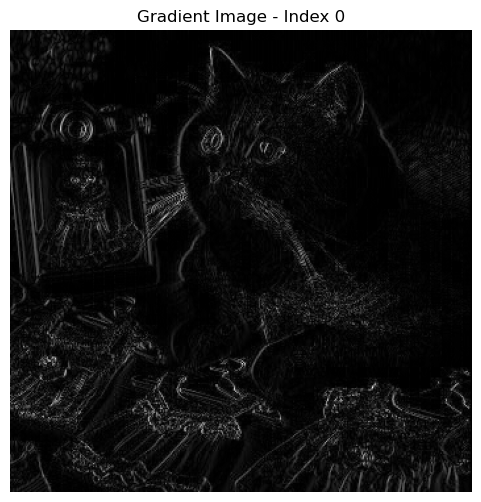

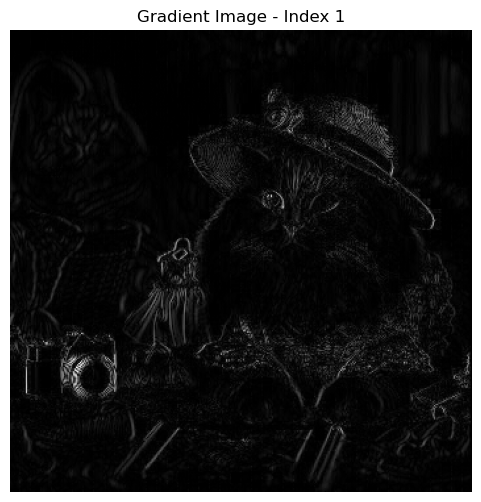

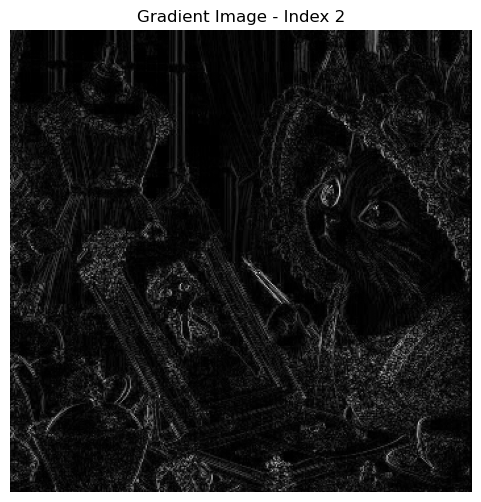

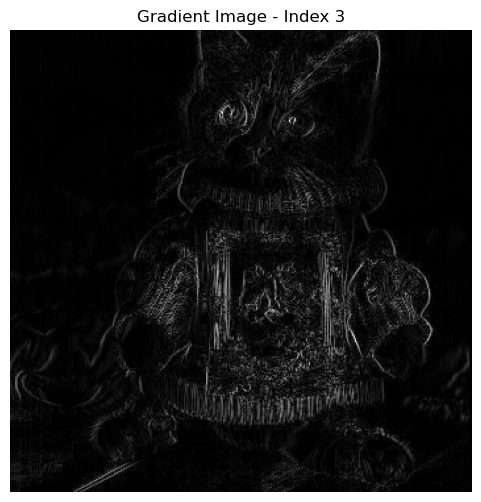

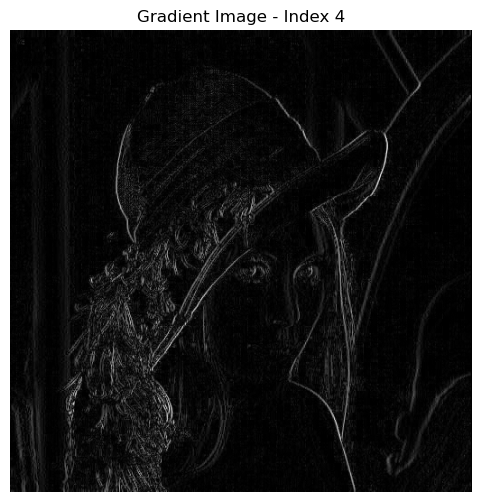

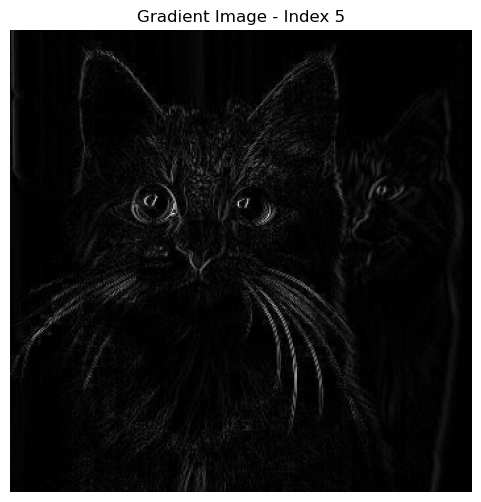

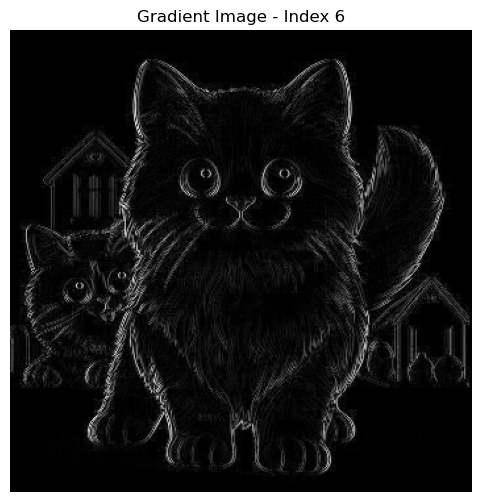

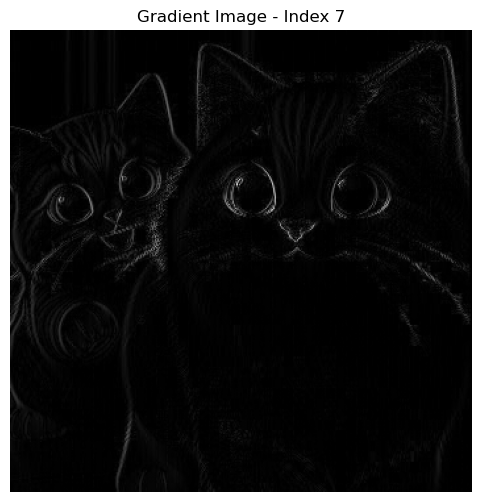

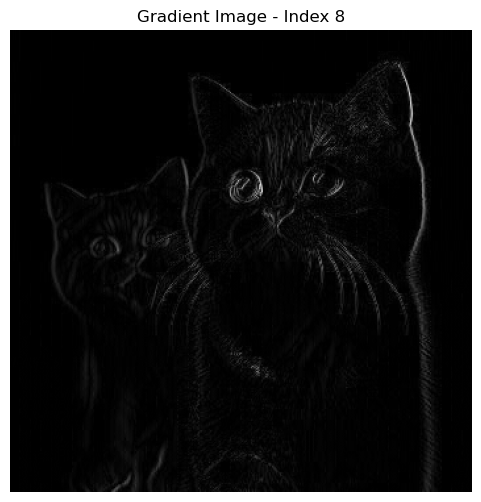

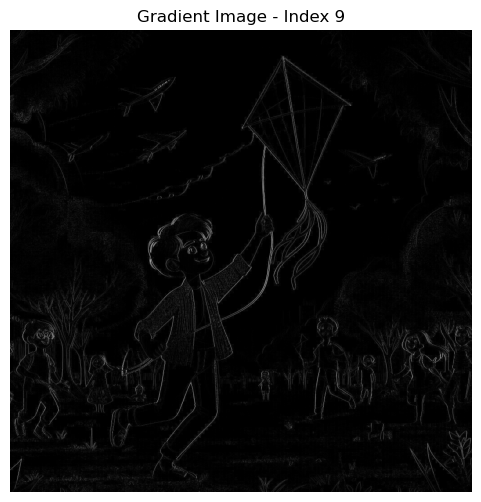

In [3]:

# Define a function to apply gradient transformation to an image
def apply_gradient_transform(image_path):
    # Read the image in grayscale
    img_gray = cv2.imread(image_path, 0)
    h, w = img_gray.shape[:2]

    grad_img = np.zeros_like(img_gray)

    for i in range(h):
        for j in range(w - 1):
            # Applying gradient
            a = min(img_gray[i, j + 1], img_gray[i, j])
            if a == img_gray[i, j + 1]:
                temp_arr = img_gray[i, j] - img_gray[i, j + 1]
            else:
                temp_arr = img_gray[i, j + 1] - img_gray[i, j]

            grad_img[i, j] = temp_arr

    return grad_img

for index, row in df.iterrows():
    # Apply gradient transformation to the image
    gradient_image = apply_gradient_transform(row['image'])

    # Display the gradient image
    plt.figure(figsize=(6, 6))
    plt.imshow(gradient_image, cmap='gray')
    plt.title(f"Gradient Image - Index {index}")
    plt.axis('off')
    plt.show()

<div style="background-color:pink; padding:20px; text-align:center; font-weight: bold;">
    <h2>Gray Scale</h2>
</div>


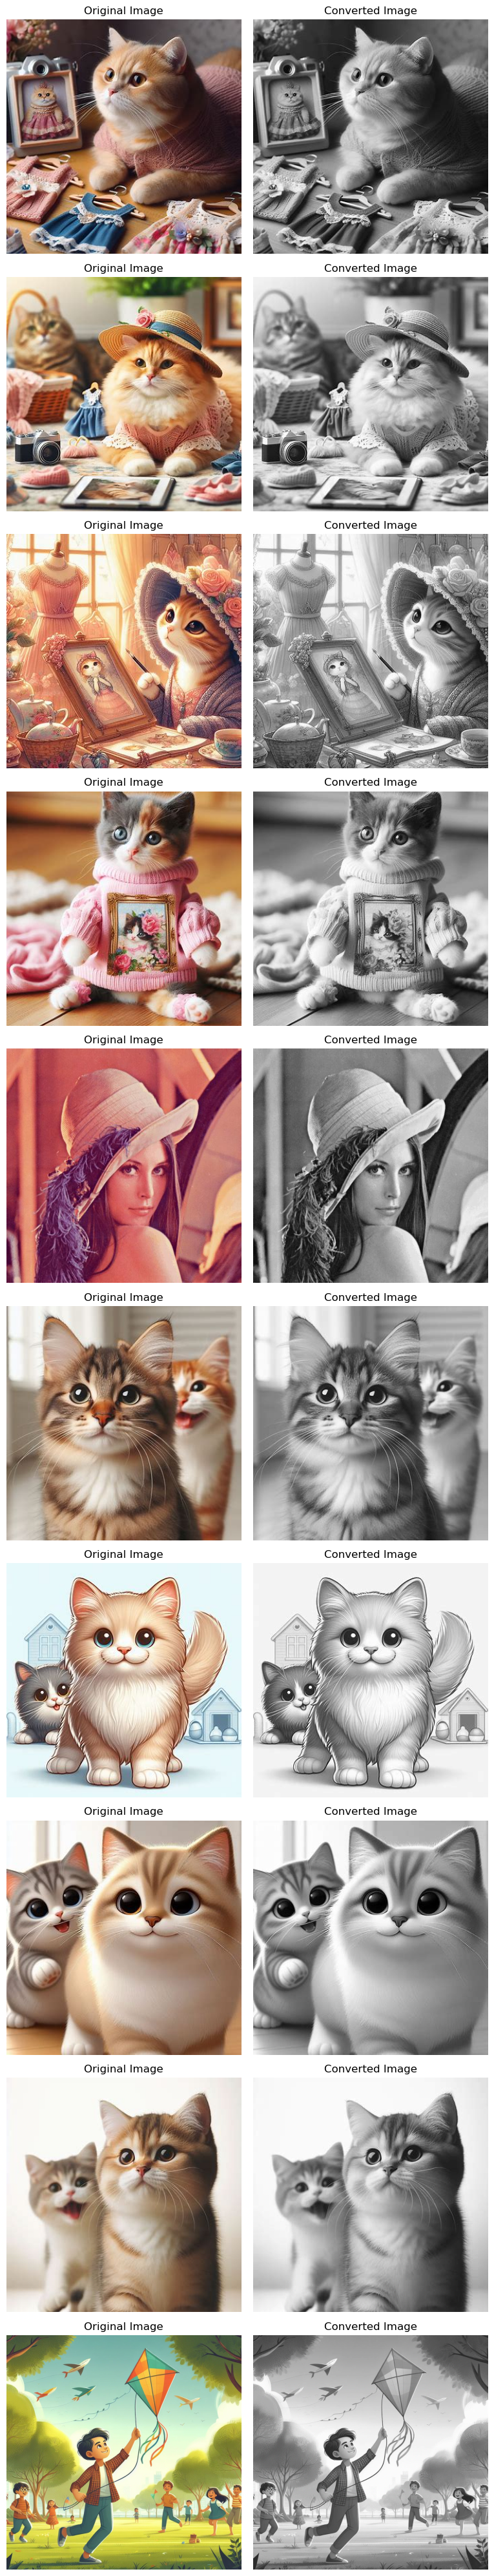

In [8]:


# Function to apply color space conversion
def convert_color_space(image_path, conversion_code=cv2.COLOR_BGR2GRAY):
   
    img = cv2.imread(image_path)
    
    # Convert the color space
    converted_img = cv2.cvtColor(img, conversion_code)
    
    return converted_img


processed_images = []
for idx, row in df.iterrows():
    converted_img = convert_color_space(row['image'], conversion_code=cv2.COLOR_BGR2GRAY)
    processed_images.append(converted_img)


fig, axes = plt.subplots(len(processed_images), 2, figsize=(8, len(processed_images)*4))
for i, (original_img, converted_img) in enumerate(zip(df['image'], processed_images)):
    original = cv2.imread(original_img)
    axes[i, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(converted_img, cmap='gray')
    axes[i, 1].set_title("Converted Image")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
